In [1]:
# Import modules and define directories
%matplotlib inline
import os,sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


workpath = os.getcwd()
rootpath = os.path.dirname(workpath)
libpath = rootpath + "/libs/"
inppath = rootpath + "/input/"
figpath = workpath + "/figs/"
qgispath = workpath + "/geo/"
primpath = rootpath + "/primnet/out/"

sys.path.append(libpath)
from pyValidationlib import Validate,GetSynthNet,Link,MeasureDistance
from pyExtractDatalib import GetRoads
print("Imported modules")

Imported modules


In [2]:
sublist = [121143, 121144, 147793, 148717, 148718, 148719, 148720, 148721, 148723,
       150353, 150589, 150638, 150692, 150722, 150723, 150724, 150725, 150726, 
       150727, 150728]
synth_net = GetSynthNet(primpath+'prim-network/',sublist)
sgeom = nx.get_edge_attributes(synth_net,'geometry')
synthgeom = {e:Link(sgeom[e]) for e in sgeom}
glength = {e:synthgeom[e].geod_length for e in sgeom}
nx.set_edge_attributes(synth_net,glength,'geo_length')

roads = GetRoads(inppath,'121')
areas = {'patrick_henry':194,'mcbryde':9001,'hethwood':7001}
V = Validate(qgispath,synth_net,areas)

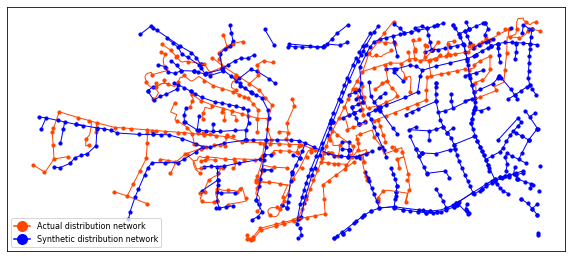

In [3]:
area = 'mcbryde'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
V.compare_networks(ax,V.area_data[area]['df_lines'],
                    V.area_data[area]['df_buses'],
                    V.area_data[area]['synthetic'])

In [10]:
def merge_nodes(graph):
    """
    Merges the nodes along 'path' in graph G into one 'new_node',
    meaning that all the edges that pointed to or from one of these
    'nodes' will point to or from the 'new_node'.
    attr_dict and **attr are defined as in 'G.add_node'.
    """
    node_interest = [n for n in graph if len(graph[n])==2]
    while(len(node_interest)!=0):
        merge = [node_interest[0]]
        ends = []
        new_nodes = [node_interest[0]]
        for m in new_nodes:
            neighbors = list(graph[m])
            for i in neighbors:
                if len(graph[i])==2:
                    new_nodes
        
        while(len(new_nodes)!=0):
            new_nodes = list(set([i for n in new_nodes for i in list(graph[n]) if len(graph[i])==2]))
            for m in new_nodes:
                if m in merge:
                    new_nodes.remove(m)
            merge.extend(new_nodes)
        merge = list(set(merge))
        print(merge)
        for n in merge:
            node_interest.remove(n)
        
        # Join the nodes if number of nodes to be merged is more than 1
        if len(merge)>1:
            ends = [i for n in merge for i in graph[n] if len(graph[i])!=2]
            for n in merge:
                graph.remove_node(n)
            graph.add_edge(ends[0],merge[0])
            graph.add_edge(merge[0],ends[1])
    return graph

KeyboardInterrupt: 

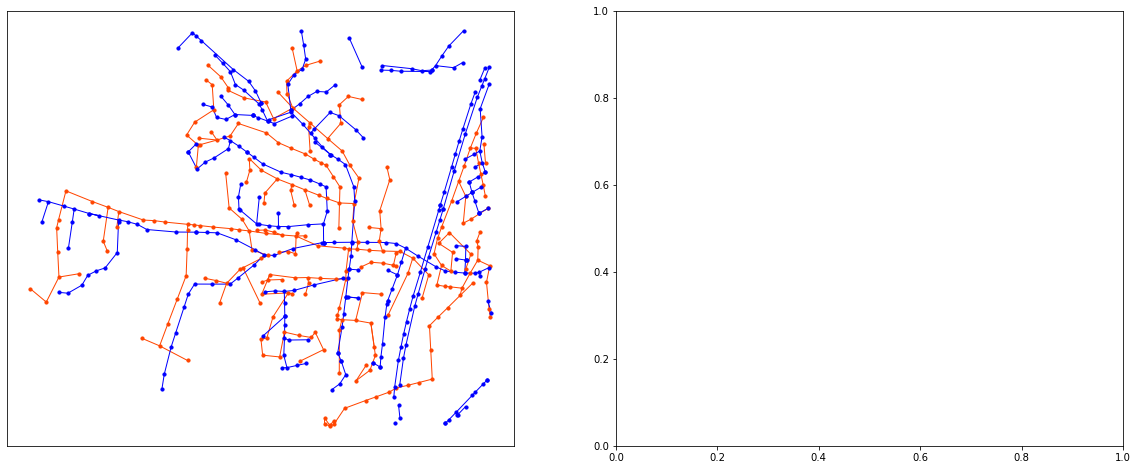

In [11]:
ymin = 37.225 
ymax = 37.245 
xmin = -80.465
xmax = -80.435
area = 'mcbryde'

primnet = V.area_data[area]['synthetic']
actnet = V.area_data[area]['actual']
synthpos = nx.get_node_attributes(primnet,'cord')
actpos = V.area_data[area]['bus_geom']


act_nodes = [n for n in actnet if xmin<=actpos[n][0]<=xmax and\
              ymin<=actpos[n][1]<=ymax]
synth_nodes = [n for n in primnet if xmin<=synthpos[n][0]<=xmax and\
              ymin<=synthpos[n][1]<=ymax]
sg_act = nx.subgraph(actnet,act_nodes)
sg_synth = nx.subgraph(primnet,synth_nodes)

nx.set_node_attributes(sg_act,actpos,'cord')
nx.set_node_attributes(sg_synth,synthpos,'cord')

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
nx.draw_networkx(sg_act,pos=actpos,ax=ax1,with_labels=False,
                node_color='orangered',edge_color='orangered',
                node_size=10.0,width=1.0)
nx.draw_networkx(sg_synth,pos=synthpos,ax=ax1,with_labels=False,
                node_color='blue',edge_color='blue',
                node_size=10.0,width=1.0)


merge_nodes(actnet)
merge_nodes(primnet)
act_nodes = [n for n in actnet if xmin<=actpos[n][0]<=xmax and\
              ymin<=actpos[n][1]<=ymax]
synth_nodes = [n for n in primnet if xmin<=synthpos[n][0]<=xmax and\
              ymin<=synthpos[n][1]<=ymax]
sg_act = nx.subgraph(actnet,act_nodes)
sg_synth = nx.subgraph(primnet,synth_nodes)
nx.draw_networkx(sg_act,pos=actpos,ax=ax1,with_labels=False,
                node_color='orangered',edge_color='orangered',
                node_size=10.0,width=1.0)
nx.draw_networkx(sg_synth,pos=synthpos,ax=ax1,with_labels=False,
                node_color='blue',edge_color='blue',
                node_size=10.0,width=1.0)

In [14]:
# Node callable function
def node_compare(att_dict_g1,att_dict_g2):
    geom1 = att_dict_g1['cord']
    geom2 = att_dict_g2['cord']
    dist = MeasureDistance(geom1,geom2)
    return dist<150.0

In [ ]:
# Edge callable function

['d', 'i', 'j']
['k', 'f']
['g']


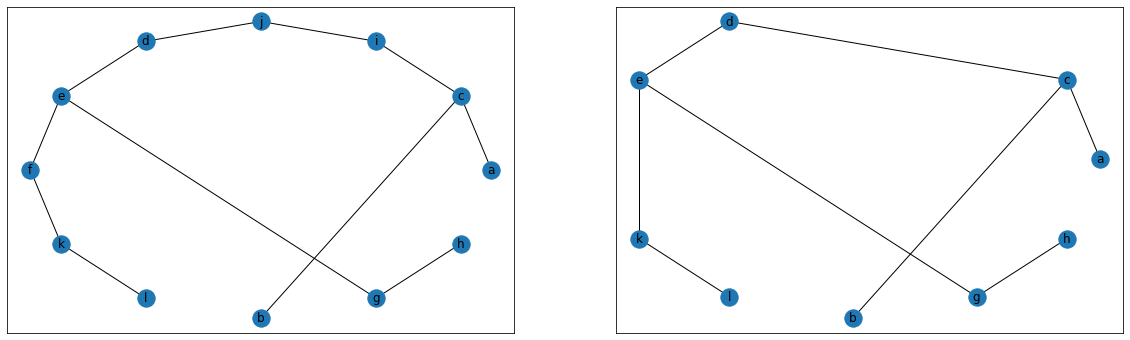

In [22]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def merge_nodes(graph):
    """
    Merges the nodes along 'path' in graph G into one 'new_node',
    meaning that all the edges that pointed to or from one of these
    'nodes' will point to or from the 'new_node'.
    attr_dict and **attr are defined as in 'G.add_node'.
    """
    node_interest = [n for n in graph if len(graph[n])==2]
    while(len(node_interest)!=0):
        merge = [node_interest[0]]
        new_nodes = [node_interest[0]]
        while(len(new_nodes)!=0):
            new_nodes = list(set([i for n in new_nodes for i in list(graph[n]) if len(graph[i])==2]))
            for m in new_nodes:
                if m in merge:
                    new_nodes.remove(m)
            merge.extend(new_nodes)
        merge = list(set(merge))
        print(merge)
        for n in merge:
            node_interest.remove(n)
        
        # Join the nodes if number of nodes to be merged is more than 1
        if len(merge)>1:
            ends = [i for n in merge for i in graph[n] if len(graph[i])!=2]
            for n in merge:
                graph.remove_node(n)
            graph.add_edge(ends[0],merge[0])
            graph.add_edge(merge[0],ends[1])
    return



fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
G = nx.Graph()
nx.add_path(G,['a','c','i','j','d','e','f','k','l'])
G.add_edges_from([('c','b'),('e','g'),('g','h')])
nodepos = nx.circular_layout(G)
nx.draw_networkx(G,ax=ax1,pos=nodepos)
merge_nodes(G)
nx.draw_networkx(G,ax=ax2,pos=nodepos)